<a href="https://colab.research.google.com/github/lucaspn017/qualitative_datas/blob/main/Stress_and_sleep_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
> In the following dataset, we have some data associated with sleep quality and mental health of students from different courses.

> I tried to verify some relationship between these two variables, always identifying how mental health could affect the quality of our sleep.

> In addition, i checked the average sleep time associated with different courses.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("orvile/stress-and-sleep-patterns")

print("Path to dataset files:", path)

100%|██████████| 17.9k/17.9k [00:00<00:00, 23.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/orvile/stress-and-sleep-patterns/versions/1


In [74]:
import os
dataset_path = "/kaggle/input/stress-and-sleep-patterns"
full_path = f"{dataset_path}/Stress and Sleep Patterns in a University at South of India"
print(os.listdir(full_path))

data = pd.read_excel(f"{full_path}/Dataset.xlsx")
sleepPatterns_df = pd.DataFrame(data)

['Dataset.xlsx']


## 1° Verify the relationship between:


> Average of sleep time by month and the dyagnosis of a mental health.

<small> It will be possible observe a relationship between the presence of a mental health and the bad quality of sleep.</small>

> The stress level doing something normal (asking for an extra ketchup packet at  a restaurant) and the age.

<small> This will indicates that these peoples came across unconfortable than the majority of people.



In [75]:
sleepPatterns_df = sleepPatterns_df.rename(columns={'How many hours of actual sleep did you get on an average for the past month? (maybe different from the number of hours spent in bed)': 'sleep time'})
sleepPatterns_df = sleepPatterns_df.rename(columns={'Have you ever been diagnosed with a mental health condition by a professional (doctor, therapist, etc.)?': 'mental disease'})
sleepPatterns_df = sleepPatterns_df.rename(columns={'How long has it taken you to fall asleep each night in the past month?':'time to sleep'})

In [76]:
sleepPatterns_df

,Timestamp,Gender,Age,Your major,mental disease,Have you ever received treatment/support for a mental health problem?,When have you usually gone to bed in the past month?,time to sleep,What time have you usually gotten up in the morning in the past month?,sleep time,...,"During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Feel too hot]","During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Have bad dreams]","During the past month, how often have you had trouble sleeping because you: (choose an option that indicate the most accurate reply for the majority of days and nights in the past month) [Have pain]",What is your stress level in these given situations [You have to submit an assignment in less than a day],What is your stress level in these given situations [A week before exams],What is your stress level in these given situations [Asking for an extra ketchup packet at a restaurant],What is your stress level in these given situations [Meeting a new person ],What is your stress level in these given situations [Asking for help],What is your stress level in these given situations [Confronting someone],What is your stress level in these given situations [Doing something without help]
0,2021-11-06 21:55:50.465,Male,18-20,Mechanical,No,No,9pm-11pm,30 minutes,8 -10 am,7-8 hours,...,Less than once a week,Not during the past month,Not during the past month,moderate,mild,not stressed,not stressed,not stressed,moderate,not stressed
1,2021-11-06 22:00:18.873,Non-binary,18-20,EEE/ECE,Yes,Yes,1am-3am,More time than 2 hours,after 10 am,7-8 hours,...,Once or twice a week,Three or more times a week,Three or more times a week,severe,moderate,severe,severe,severe,severe,moderate
2,2021-11-06 22:04:49.692,Non-binary,18-20,Computer Science,Yes,Yes,11pm-1am,30 minutes,before 8 am,7-8 hours,...,Not during the past month,Once or twice a week,Once or twice a week,moderate,moderate,moderate,moderate,moderate,moderate,moderate
3,2021-11-06 22:05:30.780,Female,18-20,Biotech,No,No,11pm-1am,1 hour,after 10 am,7-8 hours,...,Once or twice a week,Less than once a week,Not during the past month,severe,mild,not stressed,mild,mild,moderate,not stressed
4,2021-11-06 22:07:40.036,Female,18-20,Computer Science,Yes,No,1am-3am,30 minutes,8 -10 am,more than 8 hours,...,Less than once a week,Less than once a week,Once or twice a week,very severe,very severe,moderate,severe,very severe,very severe,very severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2021-11-08 11:44:53.761,Male,18-20,Computer Science,No,No,1am-3am,under 30 minutes,8 -10 am,4-6 hours,...,Not during the past month,Not during the past month,Not during the past month,mild,not stressed,not stressed,mild,moderate,mild,not stressed
112,2021-11-08 11:46:44.590,Male,18-20,Computer Science,No,No,9pm-11pm,under 30 minutes,before 8 am,7-8 hours,...,Less than once a week,Not during the past month,Not during the past month,moderate,moderate,not stressed,mild,mild,moderate,mild
113,2021-11-08 11:47:47.295,Male,18-20,Computer Science,No,No,11pm-1am,1 hour,8 -10 am,7-8 hours,...,Three or more times a week,Once or twice a week,Not during the past month,moderate,moderate,not stressed,moderate,moderate,mild,mild
114,2021-11-08 12:24:36.090,Male,18-20,Computer Science,No,No,1am-3am,under 30 minutes,8 -10 am,4-6 hours,...,Not during the past month,Not during the past month,Not during the past month,moderate,mild,not stressed,moderate,moderate,moderate,mild


In [77]:
def modify(value):
  number = re.findall(r'\d+', str(value))
  number = list(map(int,number)) # "\d" search for anyone number between 0 and 9. Meanwhile the "+" means
                                  # that it will be captured numbers in sequence.
  return sum(number)/len(number) if number else None

def alterMag(value):
  time = []
  if "hour" in value:
    time = re.findall(r'\d+',str(value))
    time = list(map(int, time))
    time = [60*int(n) for n in time]

  elif value.startswith('m'):
    time = re.findall(r'\d', str(value))
    time = list(map(int,time))
    time = [int(n)+1 for n in time] # The candidates that responds "more than", i added one hour.

  elif value.startswith('u'):
    time = re.findall(r'\d+',str(value))
    time = list(map(int, time))
    time = [int(n) - 5 for n in time]

  else:
    time = re.findall(r'\d+',str(value))
    time = list(map(int, time))

  return sum(time)/len(time) if time else None

sleepPatterns_df['sleep time'] = sleepPatterns_df['sleep time'].astype(str).apply(modify).astype(float)
sleepPatterns_df['time to sleep'] = sleepPatterns_df['time to sleep'].astype(str).apply(alterMag).astype(float)


In [78]:
sleepPatterns_df['time to sleep']

,time to sleep
0,30.0
1,120.0
2,30.0
3,60.0
4,30.0
...,...
111,25.0
112,25.0
113,60.0
114,25.0


Text(0.5, 0, 'Sleep time (h)')

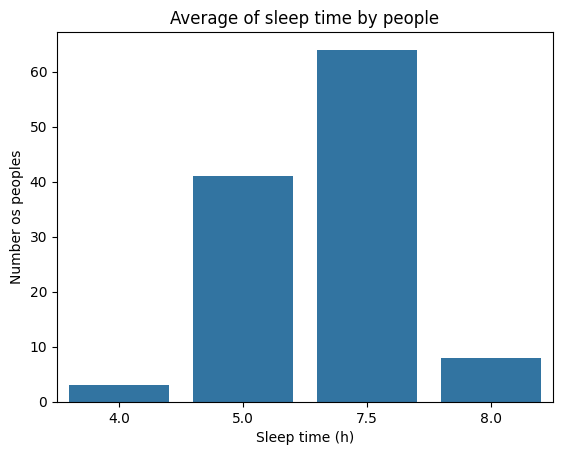

In [79]:
sleepPGrouped = sleepPatterns_df['sleep time'].value_counts()
sleepPGrouped = pd.DataFrame(sleepPGrouped)
sns.barplot(data= sleepPGrouped, x='sleep time', y='count')
plt.title('Average of sleep time by people')
plt.ylabel('Number os peoples')
plt.xlabel('Sleep time (h)')

<ipython-input-100-73722a0c86cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=timeToSleep, x='mental disease', y='time to sleep', palette={'red', 'yellow'})


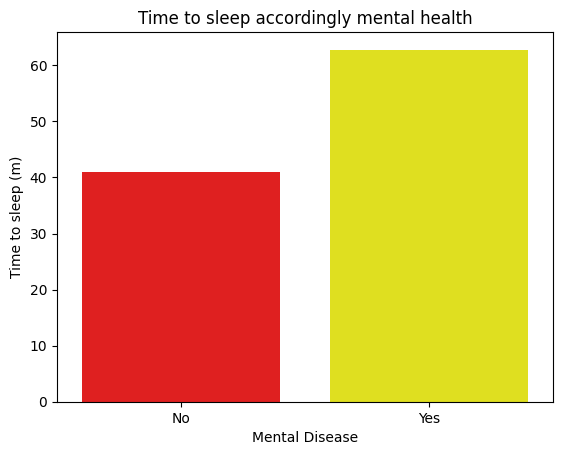

In [100]:
timeToSleep = sleepPatterns_df.groupby('mental disease')['time to sleep'].mean().reset_index()
sns.barplot(data=timeToSleep, x='mental disease', y='time to sleep', palette={'red', 'yellow'})
plt.xlabel('Mental Disease')
plt.ylabel('Time to sleep (m)')
plt.title('Time to sleep accordingly mental health')
plt.show()

<ipython-input-98-e2cedf0a84a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sleepMind, x='mental disease', y='sleep time', palette= {'red', 'blue'})


<Axes: title={'center': 'Sleep time accordingly mental health'}, xlabel='Mental Disease', ylabel='Sleep time (h)'>

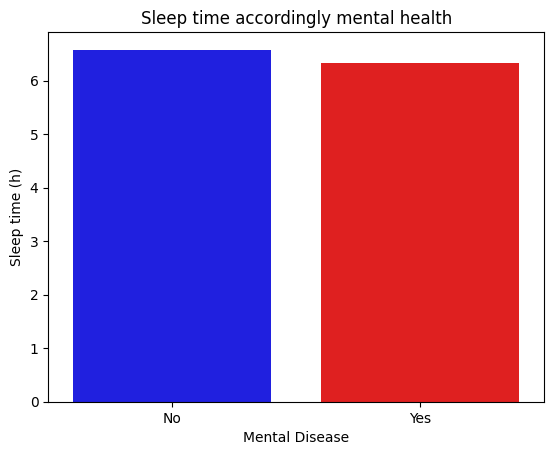

In [98]:
sleepMind = pd.DataFrame(sleepPatterns_df.groupby('mental disease')['sleep time'].mean().reset_index())
plt.title('Sleep time accordingly mental health')
plt.ylabel('Sleep time (h)')
plt.xlabel('Mental Disease')
sns.barplot(data=sleepMind, x='mental disease', y='sleep time', palette= {'red', 'blue'})

In [81]:
sleepByMajor = sleepPatterns_df.groupby('Your major')['sleep time'].mean().reset_index()
sleepByMajor

,Your major,sleep time
0,BBA,4.000000
1,Biotech,7.187500
2,Chemical,8.000000
3,Civil,6.375000
4,Computer Application,7.500000
5,Computer Science,6.500000
6,Design,7.500000
7,Designer,7.500000
8,EEE/ECE,6.000000
9,EEE/ECE/EIE,6.666667


#2° Verify the sleep time by major.

> Which course has the students with the least amount of sleep?

> And the contrary?

In [82]:
sleepByMajor = sleepPatterns_df.groupby('Your major')['sleep time'].mean().reset_index()
sleepByMajor = sleepByMajor.sort_values('sleep time',ascending=False).head(10)


def gerar_palleta(paleta):
  fig, ax = plt.subplots(figsize=(8,4))
  sns.barplot(data= sleepByMajor, x='sleep time', y='Your major', orient='h', palette=paleta )
  ax.set_ylabel('Major')
  ax.set_xlabel('Sleep time (hour)')
  ax.set_title('Top 10 of the most sleep time by major', loc='left', fontsize=14)
  plt.show()

<ipython-input-82-da2923a5513f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= sleepByMajor, x='sleep time', y='Your major', orient='h', palette=paleta )


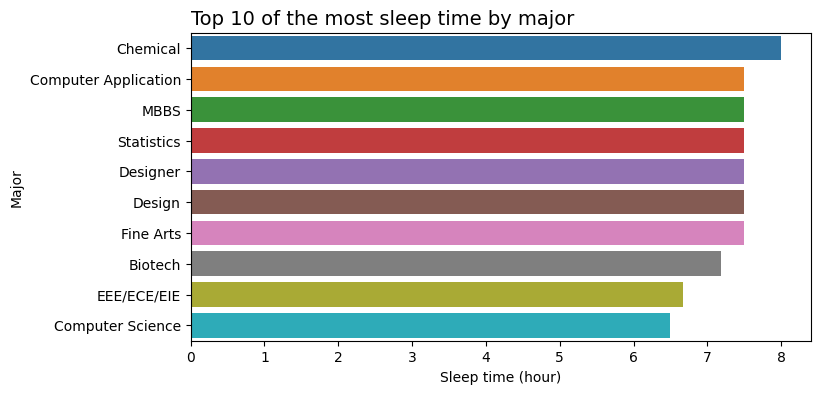

In [83]:
gerar_palleta('tab10')
plt.show()

#3° Finally, let´s verify how the age affect  the sleep time.

> Is there a high correlation between age and shorter sleep times?

In [84]:
sleepPatterns_df.describe()

,Timestamp,time to sleep,sleep time
count,116,116.000000,116.000000
mean,2021-11-07 09:01:57.308896768,42.715517,6.560345
min,2021-11-06 21:55:50.465000,25.000000,4.000000
25%,2021-11-06 23:28:20.074749952,25.000000,5.000000
50%,2021-11-07 09:05:59.852999936,25.000000,7.500000
75%,2021-11-07 11:45:31.644000,30.000000,7.500000
max,2021-11-08 15:50:44.516000,180.000000,8.000000
std,NaN,38.540731,1.294059


<ipython-input-97-46691fcb8ea5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='sleep time', data=sleepPatterns_df, palette=['orange', 'blue', 'yellow'], showmeans=True)


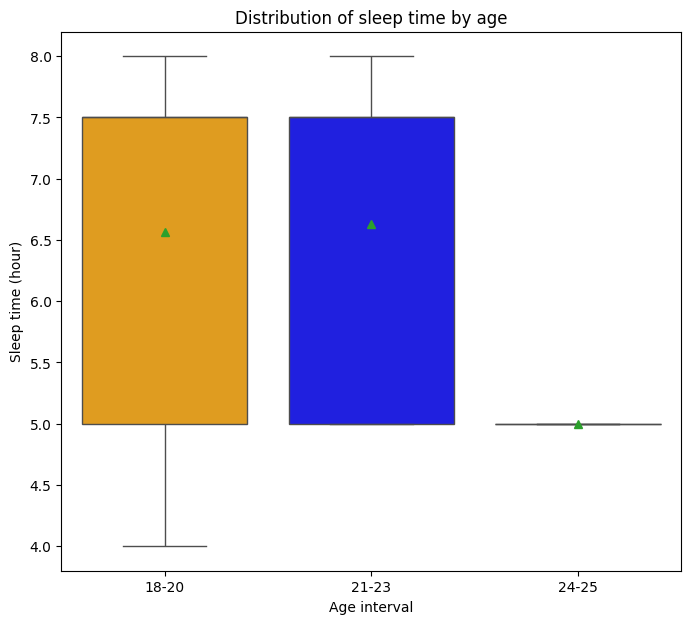

In [97]:
plt.figure(figsize=(8,7))

sns.boxplot(x='Age', y='sleep time', data=sleepPatterns_df, palette=['orange', 'blue', 'yellow'], showmeans=True)

plt.title('Distribution of sleep time by age')
plt.xlabel('Age interval')
plt.ylabel('Sleep time (hour)')
plt.show()


In [86]:
ageAndSleep = sleepPatterns_df.groupby('Age')['sleep time'].mean().reset_index()
ageAndSleep

,Age,sleep time
0,18-20,6.562500
1,21-23,6.631579
2,24-25,5.000000


# Conclusion

> It was possible to verify that the sleep time of people with mental disorders is slightly shorter than that of people without disorders.

> On the other hand, the time to sleep is 20 minutes longer than that of people without mental disorders.

> Chemistry students have the longest sleep time, unlike computer science students, who have 6.5 hours per night.